# Support Vector Classification Model - Medical No Shows

This notebook assesses the feature relevance for Medical no shows using all of the available data in a Support Vector Classification Model. 

### Import Dependencies

In [1]:
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

### Load Dataset for modelling

In [2]:
data = pd.read_csv('../data/cleanData/appointment_dataset.csv')
print(f"Shape of the data is: {data.shape}")
data.head()

Shape of the data is: (110521, 29)


,appointment_id,patient_id,repeat_patient_yn,gender_yn,time_between_sch_appt,same_day_appt_yn,within_week_appt_yn,advanced_appt_yn,monday_yn,tuesday_yn,...,young_adult_yn,adult_yn,senior_yn,welfare_assistance,hypertension,diabetes,alcoholism,handicap_yn,sms_received,no_show_yn
0,5698125,678814354693913,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5698246,54593736353128,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,5699393,4369164743113,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,5694371,54523365344664,0,1,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5698279,62917816238835,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


In [3]:
#check for nulls and verify that attributes for modelling are the correct datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110521 entries, 0 to 110520
Data columns (total 29 columns):
appointment_id                   110521 non-null int64
patient_id                       110521 non-null int64
repeat_patient_yn                110521 non-null int64
gender_yn                        110521 non-null int64
time_between_sch_appt            110521 non-null int64
same_day_appt_yn                 110521 non-null int64
within_week_appt_yn              110521 non-null int64
advanced_appt_yn                 110521 non-null int64
monday_yn                        110521 non-null int64
tuesday_yn                       110521 non-null int64
wednesday_yn                     110521 non-null int64
thursday_yn                      110521 non-null int64
friday_yn                        110521 non-null int64
saturday_yn                      110521 non-null int64
neighborhood_income_lower_yn     110521 non-null int64
neighborhood_income_middle_yn    110521 non-null int64
neigborho

### Drop irrelevent columns

In [4]:
clean_data = data.drop(['appointment_id', 'patient_id', 'time_between_sch_appt'], axis=1)

print(f"Shape of the data is: {clean_data.shape}")

Shape of the data is: (110521, 26)


### Pull our target column from the data and create a list of our outcome values

In [5]:
target = clean_data['no_show_yn']

### Drop the target column from our data 

In [6]:
data = clean_data.drop('no_show_yn', axis=1)
feature_names = data.columns
data.head()

,repeat_patient_yn,gender_yn,same_day_appt_yn,within_week_appt_yn,advanced_appt_yn,monday_yn,tuesday_yn,wednesday_yn,thursday_yn,friday_yn,...,child_yn,young_adult_yn,adult_yn,senior_yn,welfare_assistance,hypertension,diabetes,alcoholism,handicap_yn,sms_received
0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


### Split the data into training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

### Create a Support Vector Classifier and fit the training data and score with the test data

In [9]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
print(f"Training Data Score: {svclassifier.score(X_train, y_train)}")
print(f"Testing Data Score: {svclassifier.score(X_test, y_test)}")

Training Data Score: 0.7982989504162142
Testing Data Score: 0.797510043067569


### Make predictions

In [10]:
predictions = svclassifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


### View predictions along with their probabilities of being within each class

In [11]:
probs = svclassifier.predict_proba(X_test)
pred_df = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test, 
    "P(Show)": [p[0] for p in probs], 
    "P(Noshow)": [p[1] for p in probs]
    }).reset_index(drop=True)

pred_df.head(10)

AttributeError: predict_proba is not available when  probability=False

### Create a Confusion Matrix

In [14]:
confusion_matrix(y_test,predictions)

array([[22036,     0],
       [ 5595,     0]])

### Label the Confusion Matrix

In [15]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Neg: {tn}   False Pos: {fp}")
print(f"False Neg: {fn}  True Pos: {tp}")

True Neg: 22036   False Pos: 0
False Neg: 5595  True Pos: 0


### Plot Confusion Matrix of test data
Check out matrix of true positives, true negatives, false positives, and false negatives

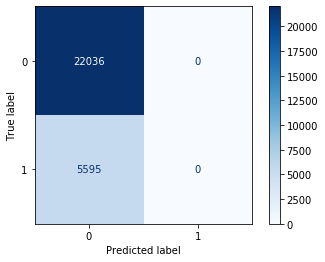

In [16]:
plot_confusion_matrix(svclassifier, X_test, y_test, cmap=plt.cm.Blues, values_format='.5g')

In [17]:
# evaluate the model using model evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, predictions))

Accuracy: 0.797510043067569
Precision: 0.0
Recall: 0.0
Matthews Correlation Coefficient: 0.0


### ROC Curve

In [18]:
plt.figure(figsize=(8,8))
predictions_proba = svclassifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions_proba)
auc = metrics.roc_auc_score(y_test, predictions_proba)
plt.title('SVC Model ROC Curve')
plt.plot(fpr, tpr, 'b', label="AUC: {:.3f}".format(auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.tight_layout()

plt.savefig('ROC_SVC.png')

plt.show()


AttributeError: predict_proba is not available when  probability=False

<Figure size 576x576 with 0 Axes>

### View features by importance

In [16]:
results = sorted(zip(svclassifier.feature_importances_, feature_names), reverse=True)
results

[(0.22197732685881277, 'same_day_appt_yn'),
 (0.12722644278623788, 'advanced_appt_yn'),
 (0.07006221674551967, 'gender_yn'),
 (0.06642412392214075, 'sms_received'),
 (0.061952848759903034, 'repeat_patient_yn'),
 (0.0404941061856799, 'within_week_appt_yn'),
 (0.03945774376840613, 'welfare_assistance'),
 (0.03861871287030464, 'diabetes'),
 (0.03710748896183932, 'hypertension'),
 (0.031137753172057633, 'handicap_yn'),
 (0.029230209462833074, 'alcoholism'),
 (0.02164182801875117, 'senior_yn'),
 (0.02157503463091242, 'wednesday_yn'),
 (0.02151250439599704, 'tuesday_yn'),
 (0.020648913208421264, 'monday_yn'),
 (0.019563118719330558, 'neighborhood_income_lower_yn'),
 (0.01956203763113526, 'friday_yn'),
 (0.018972313097854344, 'thursday_yn'),
 (0.01837752020785089, 'day_after_holiday_yn'),
 (0.01639339222456325, 'neigborhood_income_higher_yn'),
 (0.01583106585985318, 'young_adult_yn'),
 (0.014784422691666757, 'adult_yn'),
 (0.014295757117866651, 'neighborhood_income_middle_yn'),
 (0.0123094375

In [17]:
SVCresults_df = pd.DataFrame(results, columns=['feature_importances','feature_names'])
SVCresults_df = SVCresults_df.sort_values(by='feature_importances', ascending=False)
SVCresults_df

,feature_importances,feature_names
0,0.221977,same_day_appt_yn
1,0.127226,advanced_appt_yn
2,0.070062,gender_yn
3,0.066424,sms_received
4,0.061953,repeat_patient_yn
5,0.040494,within_week_appt_yn
6,0.039458,welfare_assistance
7,0.038619,diabetes
8,0.037107,hypertension
9,0.031138,handicap_yn


### Export model results to csv

In [18]:
SVCresults_df.to_csv('../data/cleanData/modelResults/SVCresults.csv', index = False, header=True)

In [19]:
SVCresults_df=SVCresults_df.set_index('feature_names')

SVCresults_df

,feature_importances
feature_names,
same_day_appt_yn,0.221977
advanced_appt_yn,0.127226
gender_yn,0.070062
sms_received,0.066424
repeat_patient_yn,0.061953
within_week_appt_yn,0.040494
welfare_assistance,0.039458
diabetes,0.038619
hypertension,0.037107


### Plot Feature Importance

<Figure size 432x288 with 0 Axes>

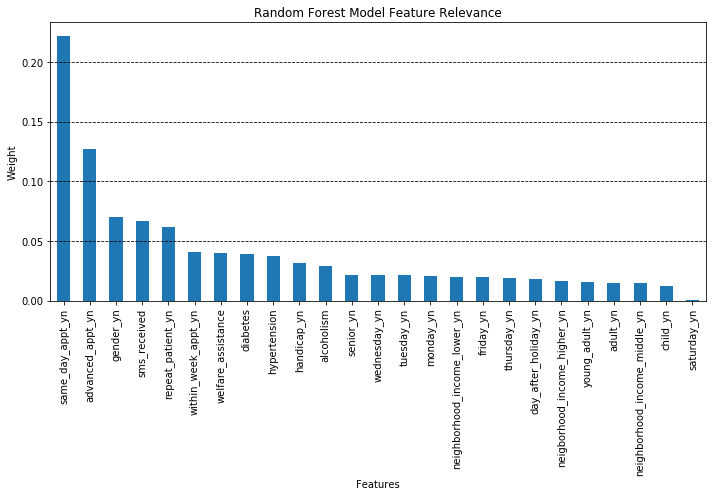

In [20]:
plt.figure()
SVCresults_df.plot(kind="bar", legend=False, figsize=(10, 7))
plt.title("Support Vector Classification Model Feature Relevance")
plt.ylabel("Weight")
plt.xlabel("Features")
# plt.yscale("log")
plt.grid(axis="y", color="k", linestyle="--")
plt.tight_layout()
plt.savefig("feature_relevance_SVC_original.png")

plt.show()
